# Home assigment 1

Please give your name below:

In [1]:
name='Robin Vestling'

# Exercise 3

You will work a bit more with reading ASCII files (I can attest, this is a routine daily task for a nuclear reactor analyst). In the attached folder (called 'train') you find several spent nuclear fuel inventories generated with the Monte Carlo transport code Serpent2. You will learn later during the course more about spent nuclear fuel, in this exercise you will need to focus only on scripting. The naming convention of the files within the folder describes the burnup or BU (ie. how long the fuel was in the reactor, and how much energy was released from it) and cooling time or CT (ie. how long the fuel was cooled after irradiation): for example 'trainBU46.00CT26.18.bumat2' belongs to a case where the burnup was 46.00 MWd/kgU and the fuel was cooled for 26.18 years after leaving the reactor. Note, that the files also contain burnup and time information, however that time is not just the cooling time, it also includes the time the fuel spent in the reactor.

The isotopes are listed with their ZAID (ie. an ID constructed as $Z\cdot1000+A$) in the files, all ending with '.15c' which refers to the temperature in the calculation, not relevant for your task. For example U235 you will find as '92235.15c'. The inventory is given as atomic concentrations for each nuclide with units $b^{-1}cm^{-1}=\frac{1}{b\cdot cm}=\frac{1}{10^{-24}cm^3}=\frac{10^{24}}{cm^3}$.  

1. Write a function which receives a filename as an input and then extracts the file content into a dictionary. Store both the concentrations and the burnup/cooling time information based on the filenames. Then apply this function to all the files (hint: you can use `os.listdir(foldername)` to list the files in the folder, for this you have to `import os`. You can read about the `os` package at [the documentation site](https://docs.python.org/3/library/os.html).)

2. Plot the concentration of Cs-137 against burnup with 'x' markers. Use 
    - blue marker if the cooling time is between 5 and 10 years.
    - red marker if the cooling time is between 10 and 15 years.
    - green marker if the cooling time is between 15 and 20 years
    - yellow marker if the cooling time is between 20 and 25 years
    - magenta marker if the cooling time is above 25 years
    - (Note you can use other colors if you prefer so, the important part is to use 5 distinct colors for these cooling time intervals).

3. Convert the concentrations to activity concentration (Bq/cm3) for Cs137, Cs134 and Eu154 (hint: you can look up the half-lifes from the internet, and make sure that you convert the units correctly). 
    - Plot the activity concentrations against burnup for the three isotopes in one figure. Use a legend.
    - Plot the activity concentrations after the fuel was removed from the reactor against burnup for the three isotopes in one figure. Use a legend. (Hint, you will need to use the cooling time information, and the decay law to figure out what was the activity before the cooling has started.)
    
4. Write a few sentences about your conclusions.

Lower cooling time indicates higher concentration of Cs-137 in the first plot. This makes sense since fewer Cs-137 particles would have less time to decay for lower cooling times than for higher ones. 

The activity concentration of Cs-137 as a function of burnup is much higher than the other isotopes. This is due to  Cs-137 being a much more common fission product than the others. 

After the fuel is removed from the reactor we see that the Cs-134 activity is higher than Cs-137 for higher burnup. This is likely due to Cs-134 being a product of neutron capture and higher burnup would mean more neutrons available for capture. On the other hand Cs-137 is a direct fission product meaning it would accumulate linearly over time. 

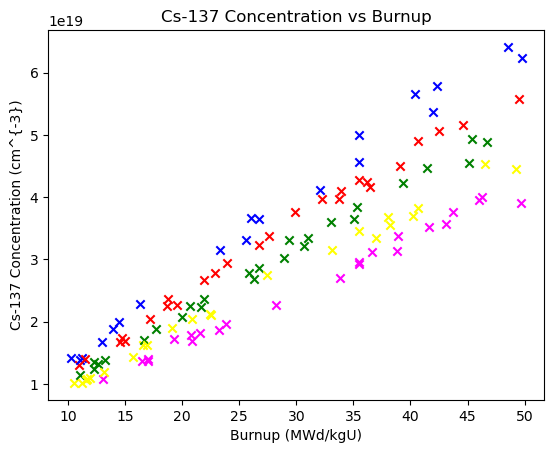

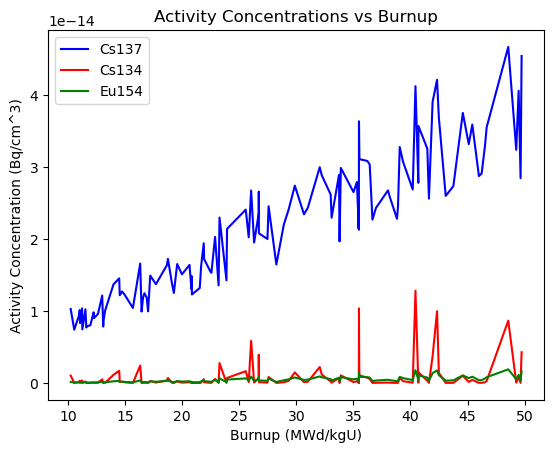

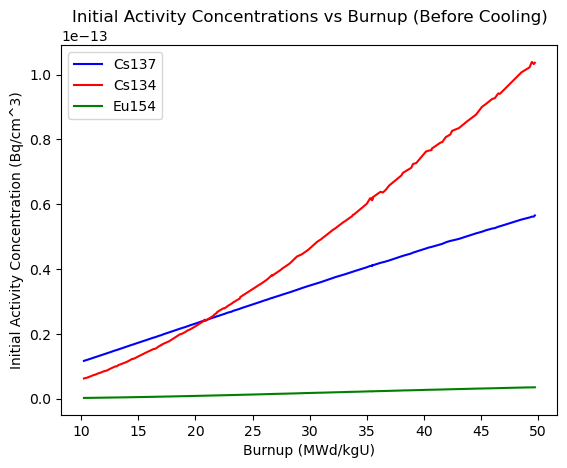

In [13]:
# here comes your solution
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_data_from_file(filename):
    """Extracts burnup, cooling time, and isotope concentrations from the file."""
    data = {}
    
    # Extract burnup and cooling time from filename using regex
    match = re.search(r'BU(\d+\.\d+)CT(\d+\.\d+)', filename)
    burnup = float(match.group(1))
    cooling_time = float(match.group(2))
    data['burnup'] = burnup
    data['cooling_time'] = cooling_time
    
    # Initialize dictionary for isotope concentrations
    isotope_concentrations = {}
    
    # Read the file content
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip() and '.15c' in line:
                parts = line.split()
                isotope = parts[0]
                concentration = float(parts[1])
                isotope_concentrations[isotope] = concentration
    
    data['concentrations'] = isotope_concentrations
    
    return data

def extract_all_files(folder):
    """Applies extract_data_from_file function to all files in a folder."""
    all_data = []
    
    for filename in os.listdir(folder):
        if filename.endswith('.bumat2'):
            file_path = os.path.join(folder, filename)
            file_data = extract_data_from_file(file_path)
            all_data.append(file_data)
    
    return all_data

def plot_cs137_vs_burnup(all_data):
    """Plots Cs-137 concentration against burnup with different colors based on cooling time."""
    colors = ['blue', 'red', 'green', 'yellow', 'magenta']
    markers = ['x'] * 5

    for data in all_data:
        burnup = data['burnup']
        cooling_time = data['cooling_time']
        cs137_concentration = data['concentrations'].get('55137.15c', 0)*1e24
        
        if 5 <= cooling_time < 10:
            color = colors[0]
        elif 10 <= cooling_time < 15:
            color = colors[1]
        elif 15 <= cooling_time < 20:
            color = colors[2]
        elif 20 <= cooling_time < 25:
            color = colors[3]
        elif cooling_time >= 25:
            color = colors[4]
        else:
            continue  # Skip cases where cooling time is out of range
        
        plt.scatter(burnup, cs137_concentration, color=color, marker='x')

    plt.xlabel('Burnup (MWd/kgU)')
    plt.ylabel('Cs-137 Concentration (cm^{-3})')
    plt.title('Cs-137 Concentration vs Burnup')
    plt.show()

def convert_to_activity_concentration(all_data):
    """Convert isotope concentrations to activity concentrations in Bq/cm^3."""
    half_lives = {
        'Cs137': 30.17 * 365 * 24 * 3600,  # in seconds
        'Cs134': 2.065 * 365 * 24 * 3600,  # in seconds
        'Eu154': 8.6 * 365 * 24 * 3600  # in seconds
    }
    
    zaids = {
        'Cs137': '55137.15c',
        'Cs134': '55134.15c',
        'Eu154': '63154.15c'
    }
    
    activity_data = {'Cs137': [], 'Cs134': [], 'Eu154': []}
    
    for data in all_data:
        burnup = data['burnup']
        cooling_time = data['cooling_time']
        
        for isotope in ['Cs137', 'Cs134', 'Eu154']:
            concentration = data['concentrations'].get(zaids[isotope], 0)
            half_life = half_lives[isotope]
            decay_constant = np.log(2) / half_life
            
            # Activity = λN
            activity_concentration = decay_constant * concentration
            
            # Store the result
            activity_data[isotope].append((burnup, activity_concentration, cooling_time))
    
    return activity_data

def plot_activity_vs_burnup(activity_data):
    """Plots activity concentrations vs burnup for Cs137, Cs134, and Eu154."""
    for isotope, color in zip(['Cs137', 'Cs134', 'Eu154'], ['blue', 'red', 'green']):
        burnups = [entry[0] for entry in activity_data[isotope]]
        activities = [entry[1] for entry in activity_data[isotope]]
        
        plt.plot(burnups, activities, label=isotope, color=color)
    
    plt.xlabel('Burnup (MWd/kgU)')
    plt.ylabel('Activity Concentration (Bq/cm^3)')
    plt.title('Activity Concentrations vs Burnup')
    plt.legend()
    plt.show()

def plot_activity_before_cooling_vs_burnup(activity_data):
    """Plots the activity concentrations before cooling against burnup for Cs137, Cs134, and Eu154."""
    half_lives = { # in seconds
        'Cs137': 30.17 * 365 * 24 * 3600,  
        'Cs134': 2.065 * 365 * 24 * 3600, 
        'Eu154': 8.6 * 365 * 24 * 3600  
    }
    
    for isotope, color in zip(['Cs137', 'Cs134', 'Eu154'], ['blue', 'red', 'green']):
        burnups = []
        activities_before_cooling = []
        
        for burnup, activity, cooling_time in activity_data[isotope]:
            decay_time = cooling_time * 365 * 24 * 3600  # Convert years to seconds
            half_life = half_lives[isotope]
            
            # Calculate initial activity before cooling
            initial_activity = activity / np.exp(-decay_time*np.log(2) / half_life)
            
            burnups.append(burnup)
            activities_before_cooling.append(initial_activity)
        
        plt.plot(burnups, activities_before_cooling, label=isotope, color=color)
    
    plt.xlabel('Burnup (MWd/kgU)')
    plt.ylabel('Initial Activity Concentration (Bq/cm^3)')
    plt.title('Initial Activity Concentrations vs Burnup (Before Cooling)')
    plt.legend()
    plt.show()

# Example usage:
folder = 'train'  # Replace with the actual folder path
all_data = extract_all_files(folder)
plot_cs137_vs_burnup(all_data)

activity_data = convert_to_activity_concentration(all_data)
plot_activity_vs_burnup(activity_data)

# Plot the activity concentrations before cooling
plot_activity_before_cooling_vs_burnup(activity_data)